# MATH GEM 

In [ ]:
import os
import google.generativeai as genai

genai.configure(api_key=os.environ["GEMINI_API_KEY"])

def upload_to_gemini(path, mime_type=None):
  """Uploads the given file to Gemini.

  See https://ai.google.dev/gemini-api/docs/prompting_with_media
  """
  file = genai.upload_file(path, mime_type=mime_type)
  print(f"Uploaded file '{file.display_name}' as: {file.uri}")
  return file

# Create the model
generation_config = {
  "temperature": 0.34,
  "top_p": 0.95,
  "top_k": 64,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="learnlm-1.5-pro-experimental",
  generation_config=generation_config,
  system_instruction="You're a maths helper. You examine the situation and <CRITICAL>create code to solve the presented problem and use code to visualize</CRITICAL>. Then you work the user through the problem so they understand how the answer came to be, citing and theorem and laws along the way to present the fullest information about the solution and its process.",
  tools='code_execution',
)

# TODO Make these files available on the local file system
# You may need to update the file paths
files = [
  upload_to_gemini("Image January 18, 2025 - 10:52PM.png", mime_type="image/png"),
]

chat_session = model.start_chat(
  history=[
    {
      "role": "user",
      "parts": [
        files[0],
        "Help me work through this",
      ],
    },
    {
      "role": "model",
      "parts": [
        "The question asks to find the equation of the line that passes through the points (4, 2) and (-7, 2).  Let's break this down.\n\n**1. Find the Slope**\n\nThe slope of a line (often denoted as 'm') describes its steepness. It's calculated using the formula:\n\n  *m = (y2 - y1) / (x2 - x1)*\n\nwhere (x1, y1) and (x2, y2) are any two points on the line.  Let's use our given points:\n\n(4, 2) as (x1, y1)\n(-7, 2) as (x2, y2)\n\n\n",
        "```python\n\n# Calculate the slope\nx1, y1 = 4, 2\nx2, y2 = -7, 2\n\nm = (y2 - y1) / (x2 - x1)\nprint(f'{m=}')\n```",
        "```Code execution output\nm=-0.0\n```",
        "The slope `m` is 0. This indicates that the line is horizontal.\n\n**2. Use the Point-Slope Form**\n\nThe point-slope form of a linear equation is:\n\n*y - y1 = m(x - x1)*\n\nWe already know the slope (m = 0) and we can use either of our points. Let's use (4, 2):\n\n*y - 2 = 0(x - 4)*\n\n**3. Simplify to Slope-Intercept Form**\n\nThe slope-intercept form is *y = mx + b*, where 'b' is the y-intercept (where the line crosses the y-axis). Let's simplify our equation:\n\n*y - 2 = 0*\n*y = 2*\n\n**Answer and Visualization**\n\nThe equation of the line is y = 2. This is a horizontal line passing through all points where the y-coordinate is 2.\n\n",
        "```python\n\nimport matplotlib.pyplot as plt\n\n# Plot the points and the line\nx_values = [4, -7]\ny_values = [2, 2]\n\nplt.plot(x_values, y_values, marker='o', linestyle='-', label='y = 2')\n\n# Add labels and title\nplt.xlabel('x')\nplt.ylabel('y')\nplt.title('Line Passing Through (4, 2) and (-7, 2)')\n\n# Show the plot with a grid\nplt.grid(True)\nplt.legend()\nplt.show()\n\n```",
        "```Code execution output\n\n```",
        "The plot visually confirms that the line y = 2 passes through both points (4, 2) and (-7, 2). Since the slope is 0, it's a horizontal line.  The y-intercept is 2, meaning the line crosses the y-axis at the point (0, 2).",
      ],
    },
  ]
)

response = chat_session.send_message("INSERT_INPUT_HERE")

print(response.text)

## Week 1

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Define the piecewise function using np.where
def f(x):
    return np.where(x < 2, 3 - 0.5 * x, 2 * x - 5)

# Generate x values
x = np.linspace(-1, 5, 100)  # More points for a smoother curve

# Calculate corresponding y values
y = f(x)

# Create the plot
plt.plot(x, y)

# Plot and label specific points (at least 4 as requested)
points = [(-1, 3.5), (0, 3), (1, 2.5), (2, -1), (3, 1), (4, 3)]
for px, py in points:
    plt.plot(px, py, 'ro', markersize=8) # Red dots for highlighted points
    plt.annotate(f'({px}, {py})', (px, py), textcoords="offset points", xytext=(0,10), ha='center')


# Customize the plot
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Graph of the Piecewise Function')

plt.grid(True)
plt.xlim(-2, 6)
plt.ylim(-3, 5)


# Show the plot
plt.show()

## Week 2

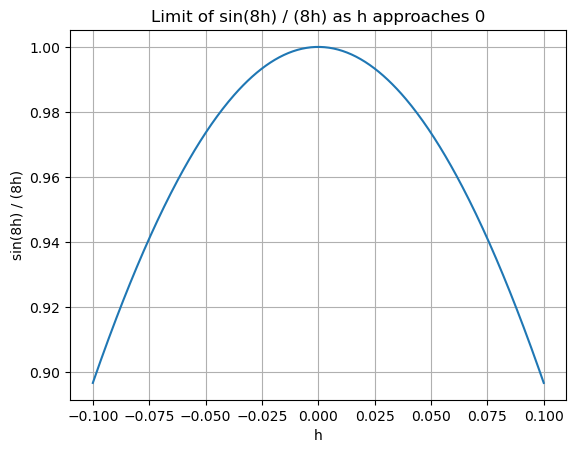

In [1]:

import numpy as np
import matplotlib.pyplot as plt

h = np.linspace(-0.1, 0.1, 400)
y = np.sin(8 * h) / (8 * h)

plt.plot(h, y)
plt.xlabel('h')
plt.ylabel('sin(8h) / (8h)')
plt.title('Limit of sin(8h) / (8h) as h approaches 0')
plt.grid(True)
plt.show()